In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
#comandi generali per importare 

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

In [5]:
Coaches = pd.read_json('coaches.json')

In [6]:
Players = pd.read_json('players.json')

In [10]:
Events = pd.read_json('events_England.json')

In [11]:
Teams = pd.read_json('teams.json')

In [12]:
Matches = pd.read_json('matches_England.json')

In [13]:
#Coaches

In [14]:
#Players

In [15]:
#Events

In [16]:
#Matches.info()

In [17]:
#Matches.describe

In [18]:
list(Teams[Teams['wyId']==1609]['officialName'])
#1609== Arsenal


['Arsenal FC']

In [19]:
casa=[]
trasferta=[]
for x in Matches['teamsData']:
    
    for y in x:
        d = {}
        if x[y]['side'] == 'home':
            d['home'] = y
            casa.append(y)
        else:
            d['away'] = y
            trasferta.append(y)
#con questo ciclo vengono create due liste con le squadre di casa e di trasferta            

In [20]:
#check casa e trasferta
len(casa)
cont = 0 
co2=0
for i in range((len(casa))):
    if casa[i]=='1609':
        cont+=1
    if trasferta[i]=='1609':
        co2+=1
print(cont==co2)
#true => la squadra 1609 (Arsenal) ha giocato 19 volte in casa, 19 in trasferta

True


In [21]:
matches_teams_VS = pd.DataFrame([list(x.keys()) for x in Matches.teamsData])
WL = pd.DataFrame({'casa':casa, 'trasferta':trasferta , 'winner':Matches.winner,'week': Matches.gameweek})
#ordiniamo WL in base alla settimana 
WL= WL.sort_values('week')
WL[:10]
#prendendo le prime 10 vedo tutta la prima giornata

,casa,trasferta,winner,week
379,1609,1631,1609,1
370,1611,1633,1611,1
371,1613,1624,1624,1
372,1651,1625,1625,1
373,1610,1646,1646,1
378,1644,1612,0,1
375,1623,1639,1623,1
376,1619,10531,0,1
377,1627,1659,1627,1
374,1628,1673,1673,1


In [24]:
#tutte le partite giocate dalla squadra 1609 => Arsenal
aa= WL[WL['casa']=='1609']
bb= WL[WL['trasferta']=='1609']
result=(pd.concat([aa, bb])).sort_values('week')
aa

,casa,trasferta,winner,week
379,1609,1631,1609,1
344,1609,1659,1609,4
320,1609,1627,1609,6
312,1609,1651,1609,7
284,1609,10531,1609,10
269,1609,1624,1609,12
244,1609,1673,1609,14
232,1609,1611,1611,15
205,1609,1613,1609,18
199,1609,1612,0,19


In [25]:
aa_list=[]
for i in range(len(aa)):
    if(aa.iloc[i]['winner']== int(aa.iloc[i]['casa'])):
        aa_list.append('home_win')
    elif(aa.iloc[i]['winner']==0):
        aa_list.append('home_draw')
    else:
        aa_list.append('home_lost')

In [26]:
for i in range(len(bb)):
    if(bb.iloc[i]['winner']== int(bb.iloc[i]['trasferta'])):
        aa_list.append('away_win')
    elif(bb.iloc[i]['winner']==0):
        aa_list.append('away_draw')
    else:
        aa_list.append('away_lost')

In [27]:
name=[]
for i in range(38):
    name.append('Arsenal')

In [28]:

indice=[]
for i in range(37):
    indice.append(i)

totale = pd.DataFrame(list(zip(aa_list,name)), 
               columns =['segno','nome']) 
totale.head()

,segno,nome
0,home_win,Arsenal
1,home_win,Arsenal
2,home_win,Arsenal
3,home_win,Arsenal
4,home_win,Arsenal


In [29]:
WL[WL['week']==1]
squadre_en=[]
for i in range(10):
    squadre_en.append(casa[i])
    squadre_en.append(trasferta[i])
print(squadre_en)
print(len(set(squadre_en))) #sono 20 quindi va bene 

['1646', '1659', '1628', '1627', '1673', '1609', '1612', '1651', '1611', '1644', '1613', '1610', '1619', '1625', '10531', '1639', '1624', '1631', '1633', '1623']
20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 9 columns):
birthArea        208 non-null object
birthDate        206 non-null object
currentTeamId    208 non-null int64
firstName        208 non-null object
lastName         208 non-null object
middleName       208 non-null object
passportArea     208 non-null object
shortName        208 non-null object
wyId             208 non-null int64
dtypes: int64(2), object(7)
memory usage: 14.7+ KB


In [34]:
##RQ2
#percentuale di vittori della squadra di casa:
WL1 = WL[['casa','winner']]
WL1
cas=list(WL['casa'])
tras=list(WL['winner'])
conta_casa=0
for i in range(len(cas)):
    if int(cas[i])==int(tras[i]):
        conta_casa+=1
#print(conta_casa)


var_1X=0
for i in range(len(cas)):
    if int(cas[i])==int(tras[i]):
        var_1X+=1
    elif int(tras[i])==0:
        var_1X+=1
#print(var_1X)
ratio_1=conta_casa/len(cas)
ratio_1X=var_1X/len(cas)
print('Percentage of home Victory',ratio_1)
print('Percentage of home Victory or Draw',ratio_1X)
#volendo modificando questi cicli si possono ottenere percentuali singole di pareggio o sconfitta per la squadra di casa


Percentage of home Victory 0.45
Percentage of home Victory or Draw 0.7157894736842105


In [35]:
#selezionare 5 Teams
squadre.head()
#prese le prime 5 che compaiono
five_star=squadre[-5:]
five_=[]
for i in range(len(five_star)):
    five_.append(five_star.iloc[i][0])
five_


['1639', '1624', '1631', '1633', '1623']

In [36]:
WL.head()

,casa,trasferta,winner,week
379,1609,1631,1609,1
370,1611,1633,1611,1
371,1613,1624,1624,1
372,1651,1625,1625,1
373,1610,1646,1646,1


In [37]:
#tutte le partite giocate dalla squadra 1639 => ?
fAcasa= WL[WL['casa']==five_[0]]
fAwin = fAcasa[['winner']]
fAcasa1= list(fAcasa['casa'])
fAwin1= list(fAwin['winner'])
ratiofA=0
for i in range(len(fAcasa)):
    if int(fAcasa1[i])==int(fAwin1[i]):
        ratiofA+=1
print(ratiofA/len(fAcasa))
#la percentuale di vittorie a casa della squadra 1646 è del 26%

0.2631578947368421


In [38]:
#tutte le partite giocate dalla squadra 1624 
fBcasa= WL[WL['casa']==five_[2]]
fBwin = fBcasa[['winner']]
fBcasa1= list(fBcasa['casa'])
fBwin1= list(fBwin['winner'])
ratiofB=0
for i in range(len(fBcasa)):
    if int(fBcasa1[i])==int(fBwin1[i]):
        ratiofB+=1
print(ratiofB/len(fBcasa))
#la percentuale di vittorie a casa della squadra 1659 è del 68%

0.3684210526315789


In [39]:
#anzi che copiare e incollare sarebbe ideale costruire una funzione che calcoli tutte le percentuali

In [40]:
#RQ4
#Players.info()
#from pandas.io.json import json_normalize
#acc=pd.DataFrame(json_normalize(data = Events['tags']))
acc1=Events['tags']
#type(acc1)  acc1 è una serie pandas
acc2=list(acc1)

#lo convertiamo in una lista
#for i in range(len(acc2)):

#col metodo find vedo se c'è 1801

#str(acc2[7]).find('1801')
#print(acc2[7])
#print(acc2[60])
#str(acc2[7]).find('1801')
l=[]
for i in range(len(acc2[:100])):
    if str(acc2[i]).find('1801')>0:
        l.append(i)
print(l)



[0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 15, 16, 17, 18, 21, 22, 25, 26, 27, 30, 31, 34, 36, 37, 38, 40, 42, 43, 44, 45, 46, 49, 53, 56, 59, 61, 65, 67, 69, 70, 72, 74, 77, 79, 80, 81, 82, 84, 85, 88, 90, 91, 96, 97, 98]


In [41]:
Pass = pd.DataFrame(Events[Events['eventName']==str('Pass')])
Pass.head()
Pass1 = pd.DataFrame({'Player':Pass.playerId, 'nome':Pass.subEventName , 'tags':Pass.tags,'squadra': Pass.teamId})
Pass1.head()
#join su squadre inglesi 
#fatto il join scrivere for per ottenere solo i tags con 1801 => passaggi riusciti 


#assegnare dei pesi: piu passaggi fa piu è importate il ratio 


,Player,nome,tags,squadra
0,25413,Simple pass,[{'id': 1801}],1609
1,370224,High pass,[{'id': 1801}],1609
2,3319,Head pass,[{'id': 1801}],1609
3,120339,Head pass,[{'id': 1801}],1609
4,167145,Simple pass,[{'id': 1801}],1609


In [42]:
#RQ5
#ratio of AirDuel 
#Air Duel=> subEventId = 10 
eventi = Events['subEventId']
AD = pd.DataFrame(Events[Events['subEventId']==int(10)])
AD.head()
#ottenuto il dataset di tutti i duelli aerei 
#intersecare con i duelli aerei delle squadre inglesi 
#vado a prendermi le colonne che mi interessano
AD = pd.DataFrame({'Player':AD.playerId, 'subEV':AD.subEventId , 'tags':AD.tags,'squadra': AD.teamId})
AD.head()
#fare join squadre inglesi 

,Player,subEV,tags,squadra
7,8013,10,"[{'id': 701}, {'id': 1802}]",1631
8,0,10,"[{'id': 703}, {'id': 1801}]",1609
12,8653,10,"[{'id': 703}, {'id': 1801}]",1631
13,25413,10,"[{'id': 701}, {'id': 1802}]",1609
27,192748,10,"[{'id': 703}, {'id': 1801}]",1631


In [120]:
##########################
#RQ6 
#To win the champioship you need only to score more goal as possible?
##########################

In [43]:
premier_league_matches = pd.read_json('matches_England.json', orient='record')
premier_league_events  = pd.read_json('events_England.json', orient='record')

In [45]:
teams = pd.read_json('teams.json')

In [46]:
premier_league_matches_sorted_by_week = premier_league_matches.sort_values(by=['gameweek'], ascending=True) 
#sort matches by number of week 
#it is a pandas dataFrame
premier_league_by_week1 = {}
premier_league_by_week = {}

teams_list = []

gameweek_list = []
a_list2=[]
b_list2=[]
for index, match in premier_league_matches_sorted_by_week.iterrows():
    # premier_league_matches has two main row --> index and match
    
    gameweek = match['gameweek'] #create gameweek (int) from match
    teamsData = match['teamsData'] #create teamsData dic from match
    
    
    home_id, away_id, home_score, away_score, home_points, away_points = '', '', 0,0,0,0
   
    previous_points_home, previous_points_away = 0,0
    
    for key in teamsData: #iterate key in teamsdata
        
        if teamsData[key]['side'] == 'home': #if side of the key is home, home_id is equal to key
            home_id = int(key)
            home_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            a_list2.append(home_score)
        else: #if side of the key is away, home_id is equal to key
            away_id = int(key)
            away_score = teamsData[key]['score'] #home_score(number of goal) is equal to score of key
            b_list2.append(away_score)
  

    #calculate previous points for teams of home and away
    if gameweek > 1: 
        previous_points_home = premier_league_by_week[gameweek-1][home_id]['points']
        previous_points_away = premier_league_by_week[gameweek-1][away_id]['points']
   
    #compare score to decide gaing points for teams of home and away
    if home_score > away_score: 
        home_points = 3
        away_points = 0
    elif away_score > home_score:
        home_points = 0
        away_points = 3
    else:
        home_points = 1
        away_points = 1
        
    home_name = teams[teams["wyId"] == home_id].name.values[0]  #make equale wyId to home_id and take home name
    away_name = teams[teams["wyId"] == away_id].name.values[0]  #make equale wyId to home_id and take away name
    
    if home_name not in teams_list:
        teams_list.append(home_name)
    if gameweek not in gameweek_list:
        gameweek_list.append(gameweek)
    if gameweek in premier_league_by_week:
        premier_league_by_week[gameweek][home_id] = {'team_name' : home_name, 'points' : home_points + previous_points_home }
        premier_league_by_week1[gameweek][home_name] = {'points' : home_points  }
    else:
        premier_league_by_week[gameweek] = {home_id: {'team_name' : home_name, 'points' : home_points + previous_points_home}}
        premier_league_by_week1[gameweek] = {home_name: {'points' : home_points}}
    premier_league_by_week[gameweek][away_id] = {'team_name' : away_name, 'points' : away_points + previous_points_away }
    premier_league_by_week1[gameweek][away_name] = {'points' : away_points  }
  

In [47]:
WL['home_goal'] = a_list2
WL['away_goal'] = b_list2
WL[-10:]

,casa,trasferta,winner,week,home_goal,away_goal
1,1628,1627,1628,38,2,0
2,1673,1609,1609,38,0,1
3,1612,1651,1612,38,4,0
4,1611,1644,1611,38,1,0
8,1624,1631,1624,38,5,4
6,1619,1625,1625,38,0,1
7,10531,1639,1639,38,1,2
9,1633,1623,1633,38,3,1
5,1613,1610,1613,38,3,0
0,1646,1659,1659,38,1,2


In [48]:
Matches['label'][:10]

0                Burnley - AFC Bournemouth, 1 - 2
1    Crystal Palace - West Bromwich Albion, 2 - 0
2              Huddersfield Town - Arsenal, 0 - 1
3       Liverpool - Brighton & Hove Albion, 4 - 0
4              Manchester United - Watford, 1 - 0
5               Newcastle United - Chelsea, 3 - 0
6            Southampton - Manchester City, 0 - 1
7                Swansea City - Stoke City, 1 - 2
8       Tottenham Hotspur - Leicester City, 5 - 4
9                West Ham United - Everton, 3 - 1
Name: label, dtype: object

In [136]:
#aa and bb 2.0
#tutte le partite giocate dalla squadra 1609 => Arsenal
aa_2= WL[WL['casa']=='1609']
bb_2= WL[WL['trasferta']=='1609']
result=(pd.concat([aa, bb])).sort_values('week')

In [137]:
contaGol= sum(aa_2['home_goal'])+sum(bb_2['away_goal'])
contaGol
#it s correct checked one by one

74

In [155]:
#funzione generica per estrarre i totali di ogni squadra
def Funzione(codice):
    aaa= WL[WL['casa']==str(codice)]
    bbb= WL[WL['trasferta']==str(codice)]
    TG = sum(aaa['home_goal'])+sum(bbb['away_goal'])
    TGR= sum(aaa['away_goal'])+sum(bbb['home_goal'])
    return([TG,TGR])

In [156]:
#funzione applicata all'Arsenal
Funzione(1609)

[74, 51]

In [157]:
d=[]
d2=[]
for i in range(20):
    d.append(Funzione(squadre_en[i])[0])
    d2.append(Funzione(squadre_en[i])[1])


In [158]:
print(list(zip(d)))

[(36,), (45,), (45,), (31,), (28,), (74,), (84,), (34,), (68,), (44,), (39,), (62,), (37,), (106,), (28,), (35,), (74,), (56,), (48,), (44,)]


In [186]:
classificaGol= pd.DataFrame(list(zip(squadre_en,d,d2)))
classificaGol.columns = [0, 'gf','gs']
classificaGol[0] = pd.to_numeric(classificaGol[0])
classificaGol = pd.merge(classificaGol,teams[['officialName','wyId']], left_on = 0, right_on = 'wyId')
classificaGol = classificaGol[['wyId', 'officialName', 'gf', 'gs']]
classificaGol.head()

,wyId,officialName,gf,gs
0,1646,Burnley FC,36,39
1,1659,AFC Bournemouth,45,61
2,1628,Crystal Palace FC,45,55
3,1627,West Bromwich Albion FC,31,56
4,1673,Huddersfield Town FC,28,58


In [130]:
#Figure 1 
# ordino in base alla classifica 
# 

In [282]:
cp1=classificaGol.sort_values('gf', ascending= False)
cp1

,wyId,officialName,gf,gs
13,1625,Manchester City FC,106,27
6,1612,Liverpool FC,84,38
5,1609,Arsenal FC,74,51
16,1624,Tottenham Hotspur FC,74,36
8,1611,Manchester United FC,68,28
11,1610,Chelsea FC,62,38
17,1631,Leicester City FC,56,60
18,1633,West Ham United FC,48,68
2,1628,Crystal Palace FC,45,55
1,1659,AFC Bournemouth,45,61


In [283]:
cp2=classificaGol.sort_values('gs')
cp2.head()

,wyId,officialName,gf,gs
13,1625,Manchester City FC,106,27
8,1611,Manchester United FC,68,28
16,1624,Tottenham Hotspur FC,74,36
6,1612,Liverpool FC,84,38
11,1610,Chelsea FC,62,38


In [194]:
# create a pandas dataframe with the teams playing at home/away
home_away = {}
for i in range(len(Matches['teamsData'])):
    home_away[i] = {}
    for x in Matches['teamsData'][i]:
        if Matches['teamsData'][i][x]['side'] == 'home':
            home_away[i].update({'home': x})
        else:
            home_away[i].update({'away': x})
home_away = pd.DataFrame(home_away).transpose()

In [195]:
# add home_away dataframe to Matches and select the columns for problem 1:
Matches = Matches.join(home_away)
RQ1_df = Matches[['gameweek', 'winner', 'home', 'away']]
RQ1_df = RQ1_df.sort_values(by=['gameweek'])

In [196]:
# inizialize scores
game_weeks = set(RQ1_df['gameweek'])
teams_playing = set(RQ1_df['home'])
scores = {}
for i in game_weeks:
    scores[i] = {}
    for x in teams_playing:
        scores[i].update({x:0})

# calculate scores
for i in range(len(Matches['gameweek'])):
    if int(Matches['winner'][i]) != 0:
        scores[Matches['gameweek'][i]][str(Matches['winner'][i])] += 3
    else:
        scores[Matches['gameweek'][i]][str(Matches['home'][i])] += 1
        scores[Matches['gameweek'][i]][str(Matches['away'][i])] += 1
partial_scores = pd.DataFrame(scores)
#
for x in range(2, len(scores)+1):
    for y in scores[x]:
        scores[x][y] += scores[x-1][y]

#
scores = pd.DataFrame(scores)

In [212]:
#we have the final ranking of Premier League
scores1= pd.DataFrame(scores[38])
scores1.columns = [0]
scores1= scores1.sort_values(0, ascending=False)
scores1.head()

,0
1625,100
1611,81
1624,77
1612,75
1610,70


pandas.core.indexes.base.Index

In [245]:
#fare un merge tra score1 e cp1
listain=scores1.index
listain #lista con valori dell'indice

Index(['1625', '1611', '1624', '1612', '1610', '1609', '1646', '1623', '1631',
       '1613', '1628', '1659', '1633', '1651', '1644', '1673', '1619', '10531',
       '1639', '1627'],
      dtype='object')

In [247]:
scores1['Codice']=listain
scores1.head()

,0,Codice
1625,100,1625
1611,81,1611
1624,77,1624
1612,75,1612
1610,70,1610


In [324]:
scores1['Codice'] = pd.to_numeric(scores1['Codice'])
P1 = pd.merge(cp1,scores1,left_on='wyId', right_on='Codice')
P1 = P1[['wyId','officialName','gf','gs',0]]
P1.columns= ['wyId','officialName','gf','gs','Points']
P1


,wyId,officialName,gf,gs,Points
0,1625,Manchester City FC,106,27,100
1,1612,Liverpool FC,84,38,75
2,1609,Arsenal FC,74,51,63
3,1624,Tottenham Hotspur FC,74,36,77
4,1611,Manchester United FC,68,28,81
5,1610,Chelsea FC,62,38,70
6,1631,Leicester City FC,56,60,47
7,1633,West Ham United FC,48,68,42
8,1628,Crystal Palace FC,45,55,44
9,1659,AFC Bournemouth,45,61,44


In [335]:
P2 = P1.sort_values('Points')
P2.Points = range(20,0,-1)
P2.columns= ['wyId','officialName','gf','gs','Rank']
P2=P2.sort_values('Rank')
P2

,wyId,officialName,gf,gs,Rank
0,1625,Manchester City FC,106,27,1
4,1611,Manchester United FC,68,28,2
3,1624,Tottenham Hotspur FC,74,36,3
1,1612,Liverpool FC,84,38,4
5,1610,Chelsea FC,62,38,5
2,1609,Arsenal FC,74,51,6
14,1646,Burnley FC,36,39,7
10,1623,Everton FC,44,58,8
6,1631,Leicester City FC,56,60,9
8,1628,Crystal Palace FC,45,55,10


In [336]:
gf=list(P2['gf'])
gs=list(P2['gs'])


In [339]:
gf

[106,
 68,
 74,
 84,
 62,
 74,
 36,
 44,
 56,
 45,
 45,
 39,
 48,
 34,
 44,
 28,
 37,
 28,
 35,
 31]

In [340]:
gs

[27,
 28,
 36,
 38,
 38,
 51,
 39,
 58,
 60,
 55,
 61,
 47,
 68,
 54,
 64,
 58,
 56,
 56,
 68,
 56]

In [341]:
clas = list(P2['wyId'])
clas.reverse()
clas

[1627,
 1639,
 10531,
 1619,
 1673,
 1644,
 1651,
 1633,
 1613,
 1659,
 1628,
 1631,
 1623,
 1646,
 1609,
 1610,
 1612,
 1624,
 1611,
 1625]

In [342]:
import matplotlib.pyplot as plt 

In [343]:
prova= list(range(1,21))
prova

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

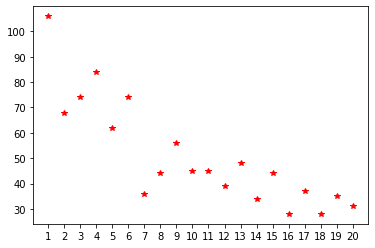

In [346]:
my_xticks = prova
plt.xticks(x, my_xticks)
plt.plot(prova,gf,'r*')
plt.show()

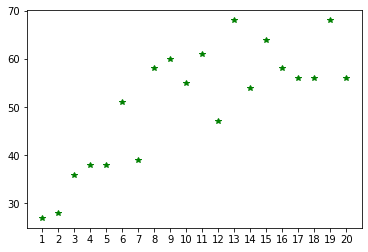

In [347]:
my_xticks = prova
plt.xticks(x, my_xticks)
plt.plot(prova,gs,'g*')
plt.show()

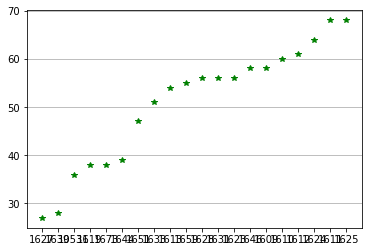

In [348]:
#creare la lista da mettere sulle X
#my_xticks = ['a', 'b', 'c', 'd']
#plt.plot(prova,gs,'g*')
#plt.xticks(x, clas)
#plt.yticks(np.arange(y.min(), y.max()))

my_xticks = clas #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y, 'g*')
plt.grid(axis='y', linestyle='-')
plt.show()

In [349]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [350]:
gs

[27,
 28,
 36,
 38,
 38,
 51,
 39,
 58,
 60,
 55,
 61,
 47,
 68,
 54,
 64,
 58,
 56,
 56,
 68,
 56]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     30.59
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.99e-05
Time:                        15:46:08   Log-Likelihood:                -68.400
No. Observations:                  20   AIC:                             140.8
Df Residuals:                      18   BIC:                             142.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3421      3.622      9.205      0.0

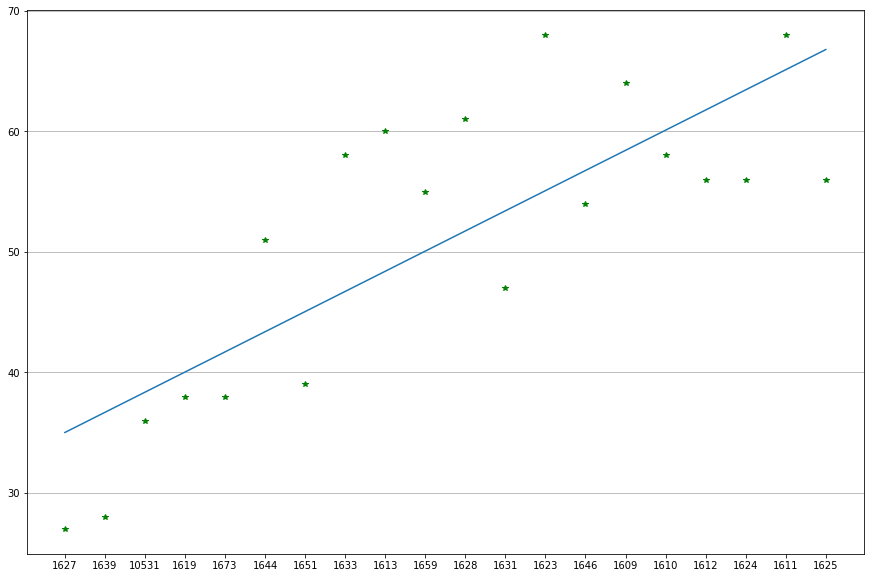

In [351]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = prova
y = gs
results1 = sm.OLS(y,sm.add_constant(x)).fit()

print(results1.summary())

my_xticks = clas #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y, 'g*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     44.37
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.99e-06
Time:                        15:46:09   Log-Likelihood:                -76.298
No. Observations:                  20   AIC:                             156.6
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.2895      5.376     15.307      0.0

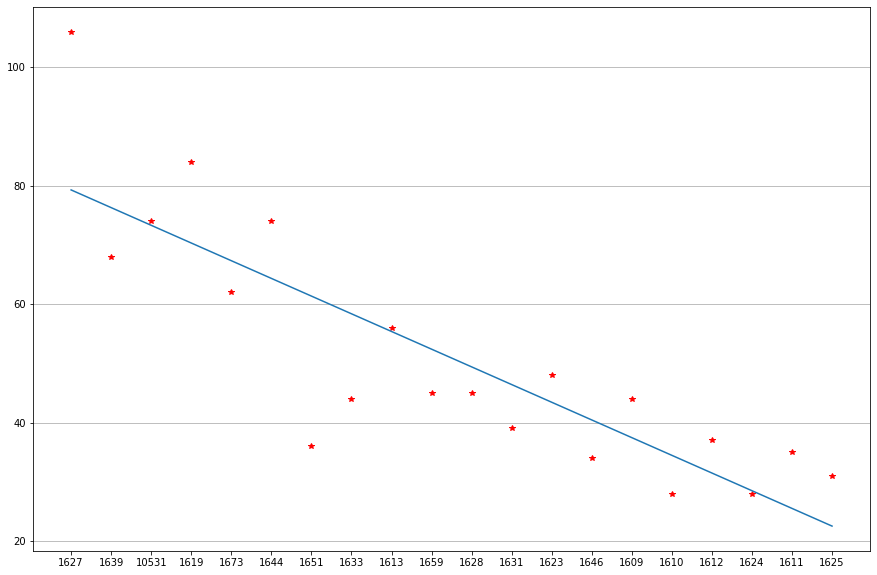

In [352]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = prova
y1 = gf
results2 = sm.OLS(y1,sm.add_constant(x)).fit()

print(results2.summary())

my_xticks = clas #lista delle squadre ordinate in base al ranking
plt.xticks(x, my_xticks)
plt.plot(x, y1, 'r*')
plt.grid(axis='y', linestyle='-')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y1, 1))(np.unique(x)))
plt.show()